In [1]:
import pystan
import numpy as np
import matplotlib.pyplot as plt
import multiprocessing
multiprocessing.set_start_method("fork", force=True)

from orbit.utils.stan import get_compiled_stan_model_simplified, compile_stan_model_simplified

In [2]:
stan_model_path = "./stan/ss_local_level.stan"
compiled_path = compile_stan_model_simplified("./stan/ss_local_level.stan")
stan_mod = get_compiled_stan_model_simplified(compiled_path)

In [3]:
x = np.random.normal(0, 0.2, 100)
y = np.cumsum(x) + np.random.normal(0, 1.0, 100)

In [4]:
y = (y - np.mean(y))/np.std(y)

In [10]:
data = {
    'N' : len(y),
    'Y' : y,
    'SD_Y' : 1.0,
    'A1' : y[0],
    'P1' : 1.0,
    'state_sigma_mean': 0.1,
    'state_sigma_sd': 1.0,
    'obs_sigma_mean': 0.5,
    'obs_sigma_sd': 1.0,
}

In [11]:
results = stan_mod.sampling(
    data=data,
    warmup=1000,
    iter=2000,
)


Gradient evaluation took 5.6e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.56 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 6.1e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.61 seconds.
Adjust your expectations accordingly!


Iteration:    1 / 2000 [  0%]  (Warmup)
Iteration:    1 / 2000 [  0%]  (Warmup)

Gradient evaluation took 6e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.6 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 5.7e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.57 seconds.
Adjust your expectations accordingly!


Iteration:    1 / 2000 [  0%]  (Warmup)
Exception initializing step size.
Posterior is improper. Please check your model.
Iteration:  200 / 2000 [ 10%]  (Warmup)
Iteration:  200 / 2000 [ 10%]  (Warmup)
Iteration:  200 / 2000 [ 10%]  (Warmup)
Iteration:  400 / 2000 [ 20%]

/Users/towinazure/opt/miniconda3/envs/ts/lib/python3.8/site-packages/pystan/diagnostics.py:217: RuntimeWarning: invalid value encountered in true_divide
  e_bfmi = numer / denom


Iteration: 1400 / 2000 [ 70%]  (Sampling)
Iteration: 1400 / 2000 [ 70%]  (Sampling)
Iteration: 1600 / 2000 [ 80%]  (Sampling)
Iteration: 1600 / 2000 [ 80%]  (Sampling)
Iteration: 1600 / 2000 [ 80%]  (Sampling)
Iteration: 1800 / 2000 [ 90%]  (Sampling)
Iteration: 2000 / 2000 [100%]  (Sampling)

 Elapsed Time: 0.156426 seconds (Warm-up)
               0.096338 seconds (Sampling)
               0.252764 seconds (Total)

Iteration: 1800 / 2000 [ 90%]  (Sampling)
Iteration: 1800 / 2000 [ 90%]  (Sampling)
Iteration: 2000 / 2000 [100%]  (Sampling)

 Elapsed Time: 0.149833 seconds (Warm-up)
               0.125993 seconds (Sampling)
               0.275826 seconds (Total)

Iteration: 2000 / 2000 [100%]  (Sampling)

 Elapsed Time: 0.154745 seconds (Warm-up)
               0.138359 seconds (Sampling)
               0.293104 seconds (Total)



In [12]:
# print(results)

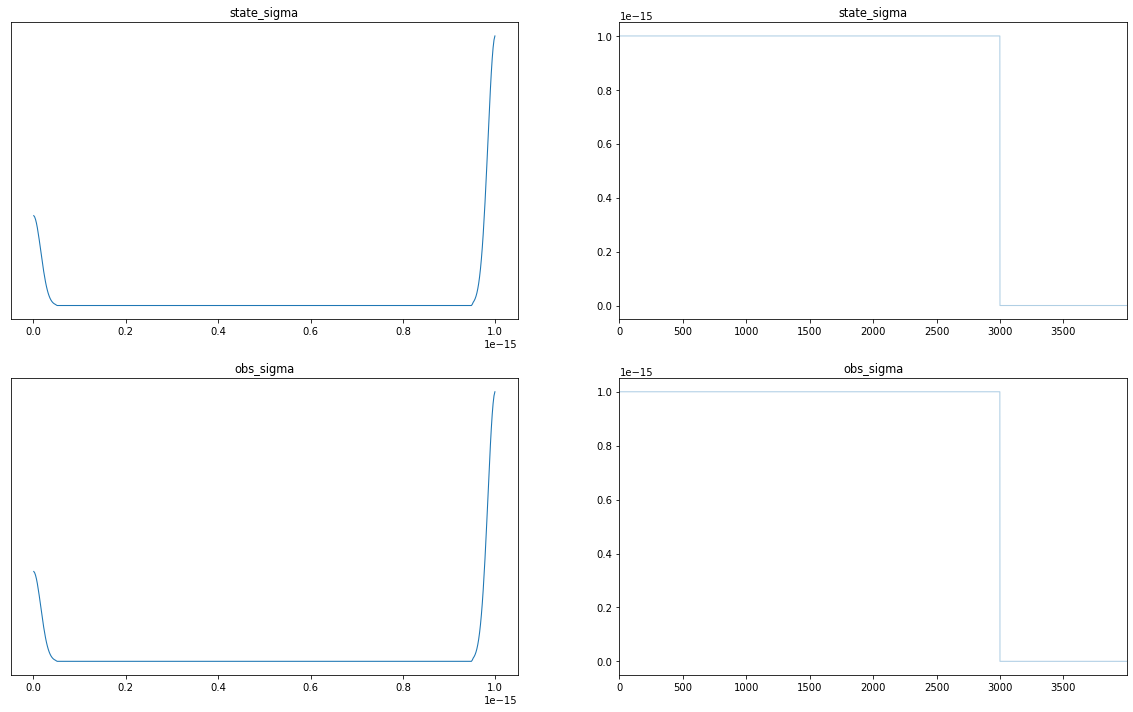

In [22]:
# diagnostic
import arviz as az
posteriors = results.extract(pars=['state_sigma', 'obs_sigma'], permuted=True)
az.plot_trace(posteriors, figsize=(20, 12));

In [14]:
posteriors = results.extract(pars=['a'], permuted=True)
states_mean = posteriors['a']
states_mean = np.mean(states_mean, 0)

In [15]:
states_mean.shape

(101,)

In [16]:
y.shape

(100,)

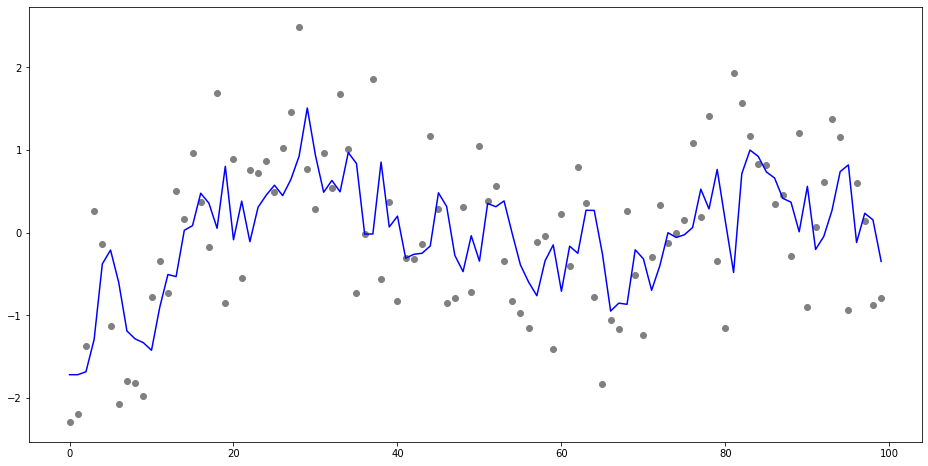

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
x = np.arange(0, len(y))
ax.scatter(x, y, c='grey')
ax.plot(x, states_mean[:-1], color='blue');